In [1054]:
import os
import time
import pickle
from collections import deque

import gym
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as layers

from matplotlib import pyplot as plt
from IPython.display import clear_output

RANDOM_SEED = 123
STATE_SIZE = 8
ACTION_SIZE = 4
BUFFER_SIZE = 10
SAVED_DATA_DIR = f'./a2c_b10_s30'

In [1254]:
def get_history(path, mov=10):
    with open(path, 'rb') as f:
        history = np.array(pickle.load(f))
        elapseds = history[:,0]
        episodes = history[:,1]
        scores = history[:,2]
        steps = history[:,3]
        mov_avg_scores = np.array([scores[max(i-mov+1, 0):i+1].mean() for i in range(len(scores))])
        mov_avg_steps = np.array([steps[max(i-mov+1, 0):i+1].mean() for i in range(len(steps))])
        acc_scores = np.array([scores[0:i+1].sum() for i in range(len(scores))])
        acc_steps = np.array([steps[0:i+1].sum() for i in range(len(steps))])
    return elapseds, episodes, mov_avg_scores, mov_avg_steps, acc_scores, elapseds, acc_steps

MOV = 100
history_b1_s0 = get_history(os.path.join('./a2c_b1_s0', 'history.pkl'), mov=MOV)
history_b5_s0 = get_history(os.path.join('./a2c_b5_s0', 'history.pkl'), mov=MOV)
history_b10_s0 = get_history(os.path.join('./a2c_b10_s0', 'history.pkl'), mov=MOV)
history_b15_s0 = get_history(os.path.join('./a2c_b15_s0', 'history.pkl'), mov=MOV)
history_b20_s0 = get_history(os.path.join('./a2c_b20_s0', 'history.pkl'), mov=MOV)
history_b30_s0 = get_history(os.path.join('./a2c_b30_s0', 'history.pkl'), mov=MOV)
history_b50_s0 = get_history(os.path.join('./a2c_b50_s0', 'history.pkl'), mov=MOV)

history_b1_s1 = get_history(os.path.join('./a2c_b1_s1', 'history.pkl'), mov=MOV)
history_b5_s1 = get_history(os.path.join('./a2c_b5_s1', 'history.pkl'), mov=MOV)
history_b10_s1 = get_history(os.path.join('./a2c_b10_s1', 'history.pkl'), mov=MOV)
history_b15_s1 = get_history(os.path.join('./a2c_b15_s1', 'history.pkl'), mov=MOV)
history_b20_s1 = get_history(os.path.join('./a2c_b20_s1', 'history.pkl'), mov=MOV)

history_b10_s3 = get_history(os.path.join('./a2c_b10_s3', 'history.pkl'), mov=MOV)
history_b10_s5 = get_history(os.path.join('./a2c_b10_s5', 'history.pkl'), mov=MOV)
history_b10_s10 = get_history(os.path.join('./a2c_b10_s10', 'history.pkl'), mov=MOV)
history_b10_s15 = get_history(os.path.join('./a2c_b10_s15', 'history.pkl'), mov=MOV)
history_b10_s20 = get_history(os.path.join('./a2c_b10_s20', 'history.pkl'), mov=MOV)
history_b10_s30 = get_history(os.path.join('./a2c_b10_s30', 'history.pkl'), mov=MOV)
history_b10_s50 = get_history(os.path.join('./a2c_b10_s50', 'history.pkl'), mov=MOV)
history_b10_s70 = get_history(os.path.join('./a2c_b10_s70', 'history.pkl'), mov=MOV)
history_b10_s100 = get_history(os.path.join('./a2c_b10_s100', 'history.pkl'), mov=MOV)

history_b15_s3 = get_history(os.path.join('./a2c_b15_s3', 'history.pkl'), mov=MOV)
history_b15_s5 = get_history(os.path.join('./a2c_b15_s5', 'history.pkl'), mov=MOV)
history_b15_s10 = get_history(os.path.join('./a2c_b15_s10', 'history.pkl'), mov=MOV)
history_b15_s15 = get_history(os.path.join('./a2c_b15_s15', 'history.pkl'), mov=MOV)
history_b15_s20 = get_history(os.path.join('./a2c_b15_s20', 'history.pkl'), mov=MOV)
history_b15_s30 = get_history(os.path.join('./a2c_b15_s30', 'history.pkl'), mov=MOV)
history_b15_s50 = get_history(os.path.join('./a2c_b15_s50', 'history.pkl'), mov=MOV)
history_b15_s70 = get_history(os.path.join('./a2c_b15_s70', 'history.pkl'), mov=MOV)
history_b15_s100 = get_history(os.path.join('./a2c_b15_s100', 'history.pkl'), mov=MOV)

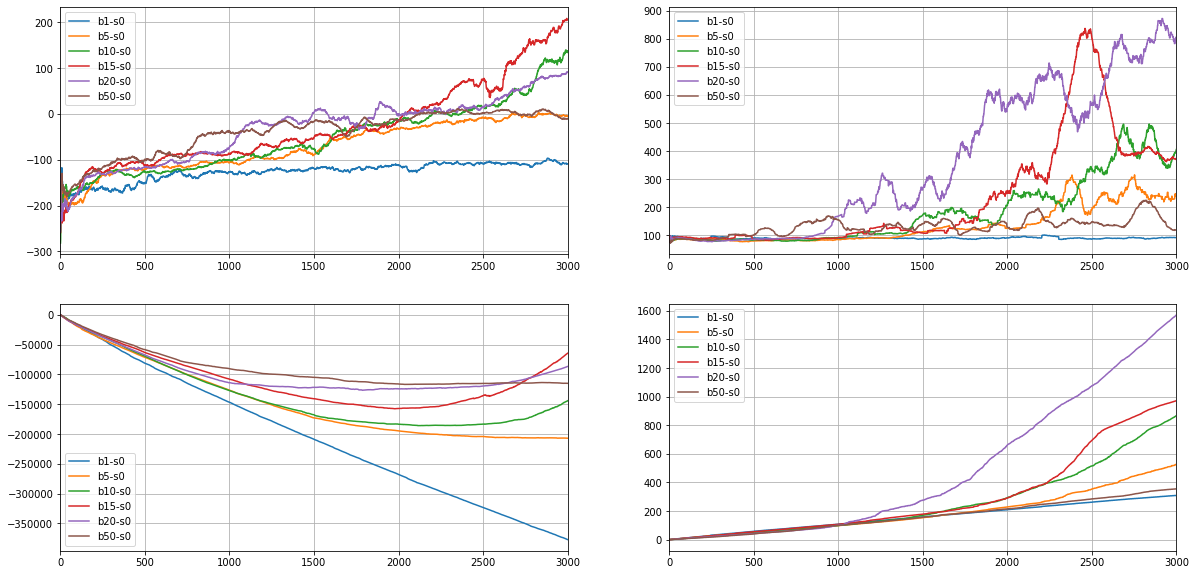

In [1255]:
plt.rcParams["figure.figsize"] = (20, 10)
legend_locs = ['upper left', 'upper left', 'lower left', 'upper left']

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    plt.grid()
    plt.xlim(0, 3000)
    plt.plot(history_b1_s0[1], history_b1_s0[i+2], label='b1-s0')
    plt.plot(history_b5_s0[1], history_b5_s0[i+2], label='b5-s0')
    plt.plot(history_b10_s0[1], history_b10_s0[i+2], label='b10-s0')
    plt.plot(history_b15_s0[1], history_b15_s0[i+2], label='b15-s0')
    plt.plot(history_b20_s0[1], history_b20_s0[i+2], label='b20-s0')
    plt.plot(history_b50_s0[1], history_b50_s0[i+2], label='b50-s0')
    plt.legend(loc=legend_locs[i])

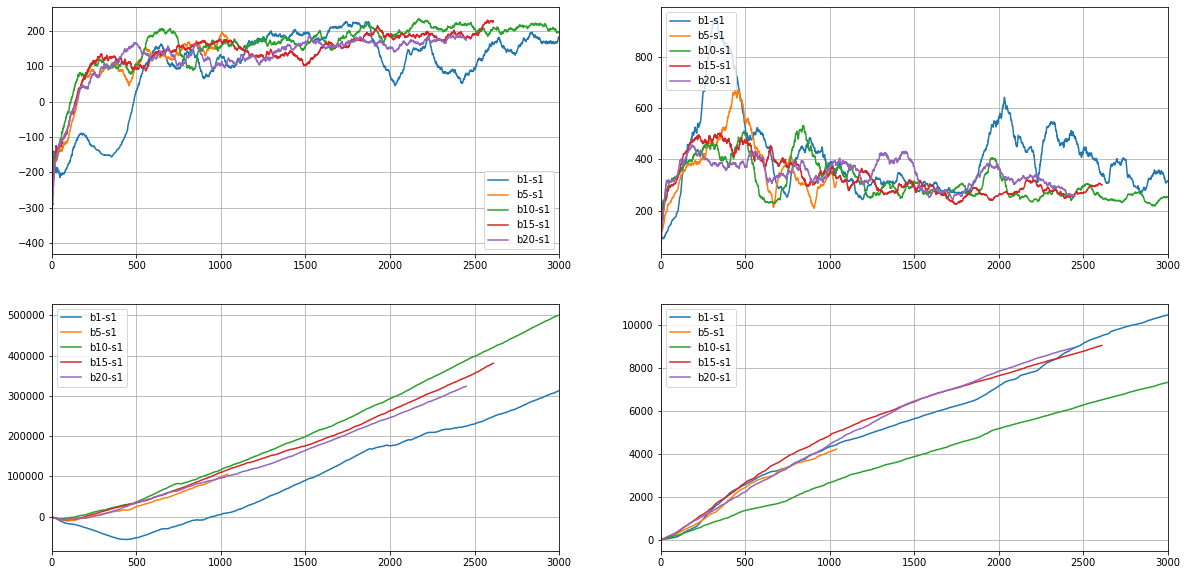

In [1258]:
plt.rcParams["figure.figsize"] = (20, 10)
legend_locs = ['lower right', 'upper left', 'upper left', 'upper left']
max_episode = 3000
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    plt.grid()
    plt.xlim(0, max_episode)
    plt.plot(history_b1_s1[1][:max_episode], history_b1_s1[i+2][:max_episode], label='b1-s1')
    plt.plot(history_b5_s1[1][:max_episode], history_b5_s1[i+2][:max_episode], label='b5-s1')
    plt.plot(history_b10_s1[1][:max_episode], history_b10_s1[i+2][:max_episode], label='b10-s1')
    plt.plot(history_b15_s1[1][:max_episode], history_b15_s1[i+2][:max_episode], label='b15-s1')
    plt.plot(history_b20_s1[1][:max_episode], history_b20_s1[i+2][:max_episode], label='b20-s1')
    plt.legend(loc=legend_locs[i])

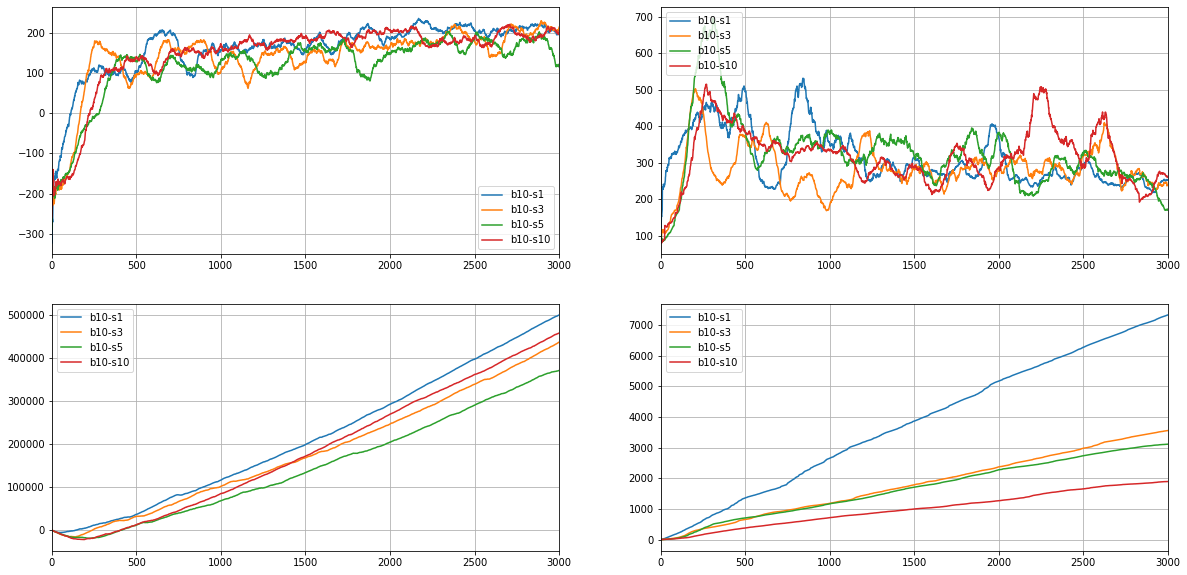

In [1212]:
plt.rcParams["figure.figsize"] = (20, 10)
legend_locs = ['lower right', 'upper left', 'upper left', 'upper left']

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    plt.grid()
    plt.xlim(0, 3000)
    plt.plot(history_b10_s1[1], history_b10_s1[i+2], label='b10-s1')
    plt.plot(history_b10_s3[1], history_b10_s3[i+2], label='b10-s3')
    plt.plot(history_b10_s5[1], history_b10_s5[i+2], label='b10-s5')
    plt.plot(history_b10_s10[1], history_b10_s10[i+2], label='b10-s10')
    plt.legend(loc=legend_locs[i])


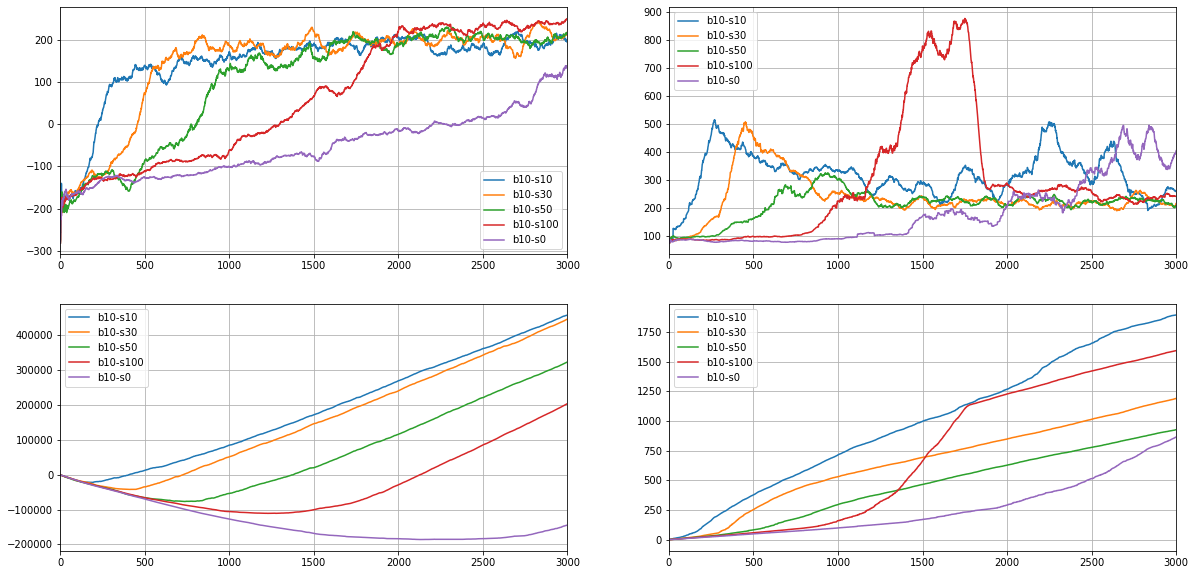

In [1213]:
plt.rcParams["figure.figsize"] = (20, 10)
legend_locs = ['lower right', 'upper left', 'upper left', 'upper left']

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    plt.grid()
    plt.xlim(0, 3000)
    plt.plot(history_b10_s10[1], history_b10_s10[i+2], label='b10-s10')
#     plt.plot(history_b10_s15[1], history_b10_s15[i+2], label='b10-s15') # 빼기
#     plt.plot(history_b10_s20[1], history_b10_s20[i+2], label='b10-s20') # 빼기
    plt.plot(history_b10_s30[1], history_b10_s30[i+2], label='b10-s30')
    plt.plot(history_b10_s50[1], history_b10_s50[i+2], label='b10-s50')
#     plt.plot(history_b10_s70[1], history_b10_s70[i+2], label='b10-s70')
    plt.plot(history_b10_s100[1], history_b10_s100[i+2], label='b10-s100')
    plt.plot(history_b10_s0[1], history_b10_s0[i+2], label='b10-s0')
    plt.legend(loc=legend_locs[i])


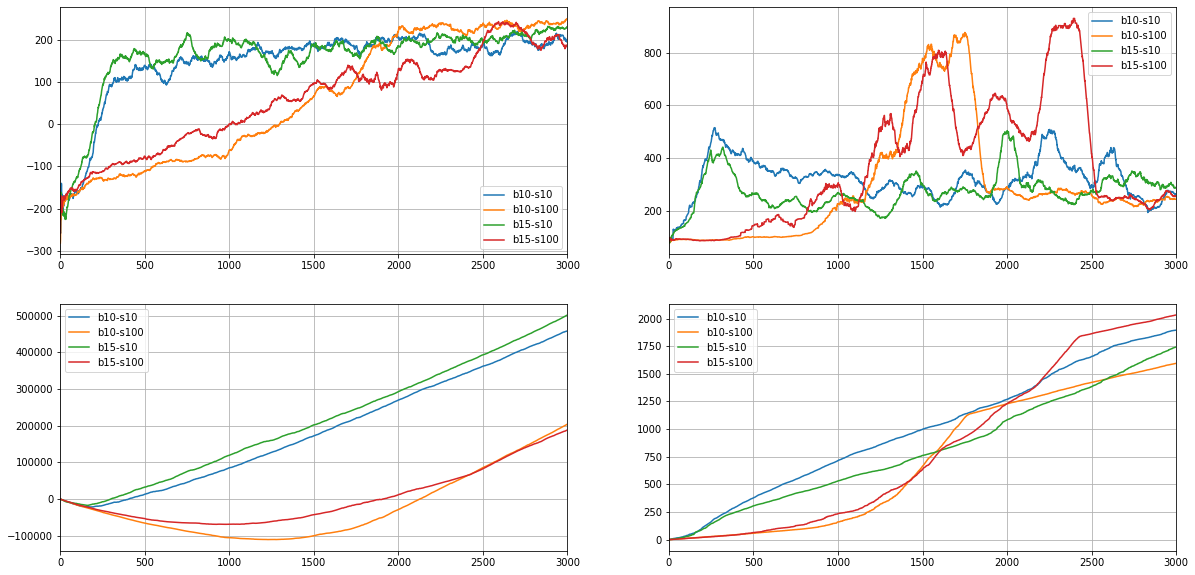

In [1219]:
plt.rcParams["figure.figsize"] = (20, 10)
legend_locs = ['lower right', 'upper right', 'upper left', 'upper left']

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    plt.grid()
    plt.xlim(0, 3000)
#     plt.plot(history_b10_s1[1], history_b10_s1[i+2], label='b10-s1') # 토탈 점수 1등
    
    plt.plot(history_b10_s10[1], history_b10_s10[i+2], label='b10-s10') # 토탈 점수 대결, 속도 좋음
    
    plt.plot(history_b10_s100[1], history_b10_s100[i+2], label='b10-s100') # 마지막 완성도 1등
    
    
#     plt.plot(history_b1_s1[1], history_b1_s1[i+2], label='b1-s1') # 토탈 점수 대결
#     plt.plot(history_b1_s10[1], history_b1_s10[i+2], label='b1-s10') # 토탈 점수 대결
#     plt.plot(history_b1_s70[1], history_b1_s70[i+2], label='b1-s70') # 마지막 완성도 대결
    
    plt.plot(history_b15_s10[1], history_b15_s10[i+2], label='b15-s10') # 토탈 점수 1등
    plt.plot(history_b15_s100[1], history_b15_s100[i+2], label='b15-s100') # 마지막 완성도 대결
    
    plt.legend(loc=legend_locs[i])


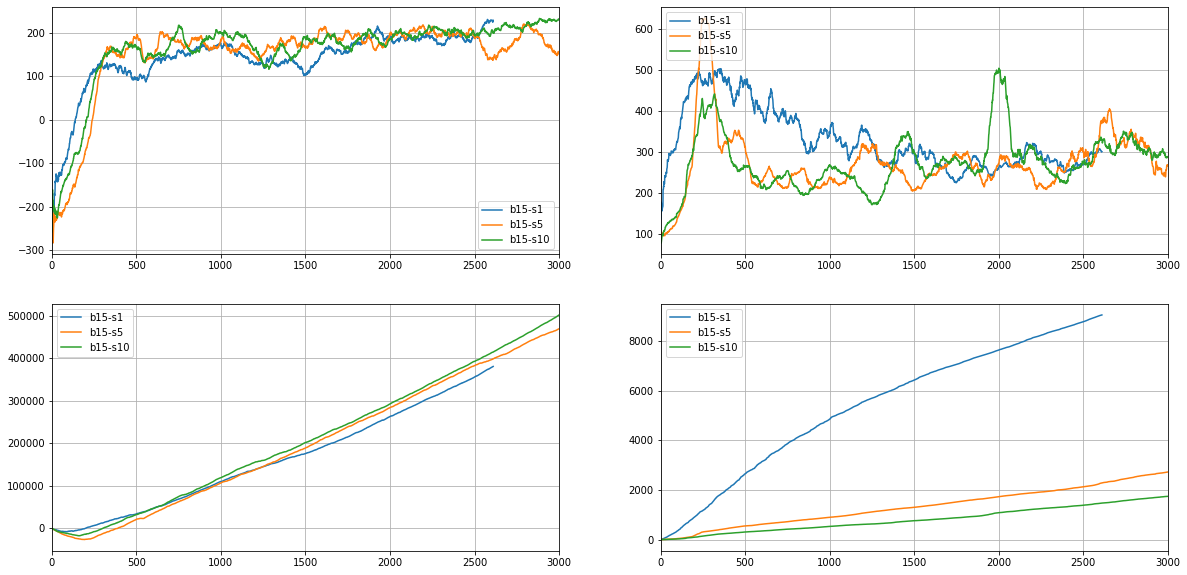

In [1259]:
plt.rcParams["figure.figsize"] = (20, 10)
legend_locs = ['lower right', 'upper left', 'upper left', 'upper left']

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    plt.grid()
    plt.xlim(0, 3000)
    plt.plot(history_b15_s1[1], history_b15_s1[i+2], label='b15-s1')
#     plt.plot(history_b15_s3[1], history_b15_s3[i+2], label='b15-s3')
    plt.plot(history_b15_s5[1], history_b15_s5[i+2], label='b15-s5')
    plt.plot(history_b15_s10[1], history_b15_s10[i+2], label='b15-s10')
    plt.legend(loc=legend_locs[i])


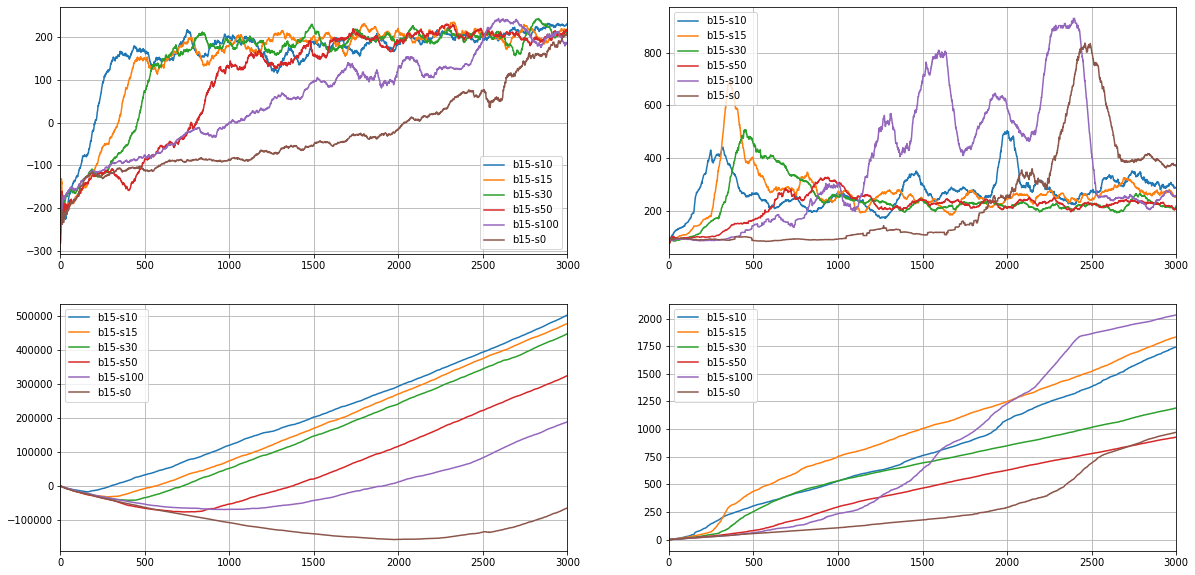

In [1231]:
plt.rcParams["figure.figsize"] = (20, 10)
legend_locs = ['lower right', 'upper left', 'upper left', 'upper left']

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    plt.grid()
    plt.xlim(0, 3000)
    plt.plot(history_b15_s10[1], history_b15_s10[i+2], label='b15-s10')
    plt.plot(history_b15_s15[1], history_b15_s15[i+2], label='b15-s15')
#     plt.plot(history_b15_s20[1], history_b15_s20[i+2], label='b15-s20')
    plt.plot(history_b10_s30[1], history_b10_s30[i+2], label='b15-s30')
    plt.plot(history_b10_s50[1], history_b10_s50[i+2], label='b15-s50')
#     plt.plot(history_b15_s70[1], history_b15_s70[i+2], label='b15-s70')
    plt.plot(history_b15_s100[1], history_b15_s100[i+2], label='b15-s100')
    plt.plot(history_b15_s0[1], history_b15_s0[i+2], label='b15-s0')
    plt.legend(loc=legend_locs[i])


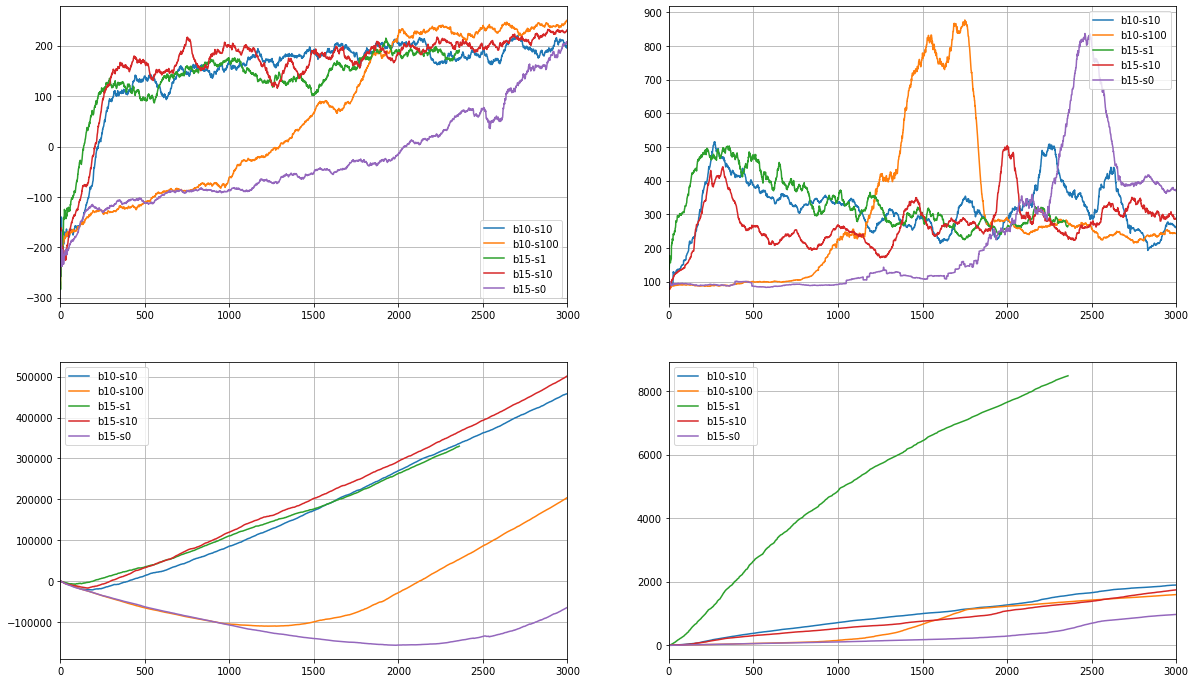

In [1246]:
plt.rcParams["figure.figsize"] = (20,12)
legend_locs = ['lower right', 'upper right', 'upper left', 'upper left']

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    plt.grid()
    plt.xlim(0, 3000)
#     plt.plot(history_b10_s1[1], history_b10_s1[i+2], label='b10-s1') # 토탈 점수 대결, 속도 안좋음
    plt.plot(history_b10_s10[1], history_b10_s10[i+2], label='b10-s10') # 토탈 점수 대결, 속도 좋음
#     plt.plot(history_b10_s70[1], history_b10_s70[i+2], label='b10-s70') # 마지막 완성도 대결
    plt.plot(history_b10_s100[1], history_b10_s100[i+2], label='b10-s100') # 마지막 완성도 대결
    
#     plt.plot(history_b1_s1[1], history_b1_s1[i+2], label='b1-s1') # 토탈 점수 대결
#     plt.plot(history_b1_s10[1], history_b1_s10[i+2], label='b1-s10') # 토탈 점수 대결
#     plt.plot(history_b1_s70[1], history_b1_s70[i+2], label='b1-s70') # 마지막 완성도 대결
#     plt.plot(history_b1_s100[1], history_b1_s100[i+2], label='b1-s100') # 마지막 완성도 대결
    
    plt.plot(history_b15_s1[1], history_b15_s1[i+2], label='b15-s1') # 토탈 점수 대결, 속도 안좋음
    plt.plot(history_b15_s10[1], history_b15_s10[i+2], label='b15-s10') # 토탈 점수 대결 (?), 속도 좋음 (?)
    plt.plot(history_b15_s0[1], history_b15_s0[i+2], label='b15-s0') # 토탈 점수 대결 (?), 속도 좋음 (?)
#     plt.plot(history_b15_s70[1], history_b15_s70[i+2], label='b15-s70') # 마지막 완성도 대결
#     plt.plot(history_b15_s100[1], history_b15_s100[i+2], label='b15-s100') # 마지막 완성도 대결
    
    plt.legend(loc=legend_locs[i])


In [1261]:
BUFFER_SIZE = 15
STEP_SIZE = 1
EPISODE = 3000

SAVED_DATA_DIR = f'a2c_b{BUFFER_SIZE}_s{STEP_SIZE}'
MODEL_NALE = f'model/actor-{EPISODE}'

env = gym.make('LunarLander-v2')
env.viewer = None


class ActorModel(tf.keras.Model):
    def __init__(self, state_size, action_size):
        super(__class__, self).__init__()
        self.dense1 = layers.Dense(512, activation='relu')
        self.out = layers.Dense(action_size, activation='softmax')
        self.build(input_shape=(None, state_size))
    
    def call(self, x):
        x = self.dense1(x)
        policy = self.out(x)
        return policy

model = ActorModel(BUFFER_SIZE * STATE_SIZE, ACTION_SIZE)
model.load_weights(os.path.join(SAVED_DATA_DIR, MODEL_NALE))

for episode in range(1, 8):
    score = 0
    step = 0
    buffer = deque(np.zeros((BUFFER_SIZE, STATE_SIZE), dtype='float32'), maxlen=BUFFER_SIZE)
    
    done = False
    state = env.reset()
    buffer.append(state)
    state = np.array(buffer).flatten()
    
    while not done:
        env.render()
        policy = np.array(model(state.reshape(1, -1))[0])
        action = policy.argmax()
#         action = np.random.choice(ACTION_SIZE, 1, p=policy)[0]
        next_state, reward, done, _ = env.step(action)
        buffer.append(next_state)
        next_state = np.array(buffer).flatten()
        score += reward
        step += 1
        state = next_state
        
    print("episode: {:4d} | score: {:4.2f} | step: {:4d}".format(episode, score, step))
env.close()

episode:    1 | score: 258.66 | step:  245
episode:    2 | score: 241.77 | step:  223
episode:    3 | score: 252.61 | step:  280
episode:    4 | score: 263.51 | step:  229
episode:    5 | score: 239.50 | step:  250
episode:    6 | score: 300.11 | step:  171
episode:    7 | score: 243.22 | step:  228
